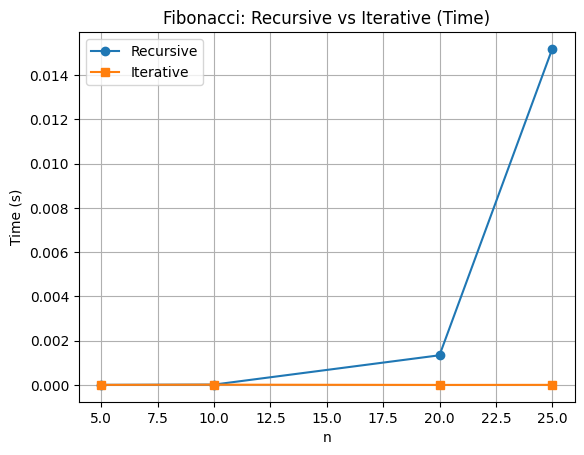

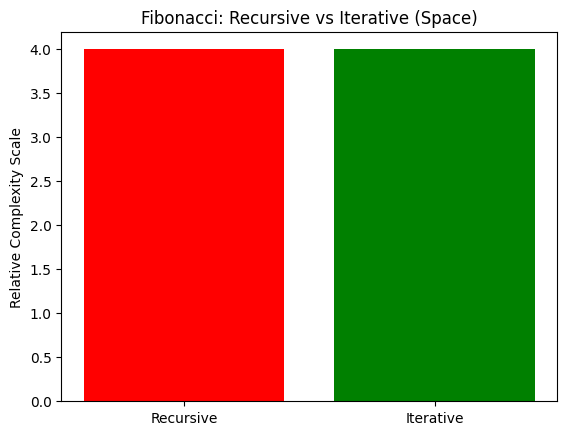

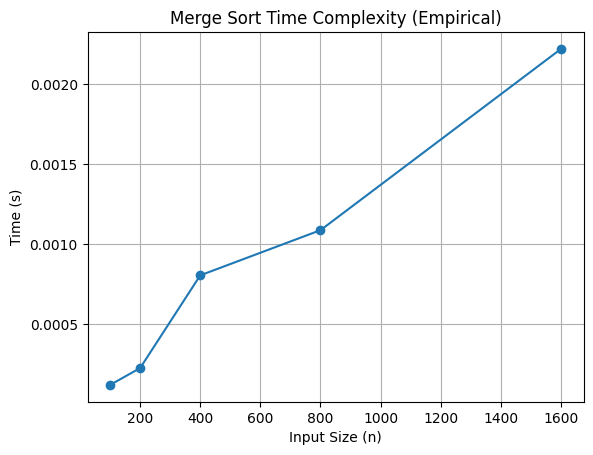

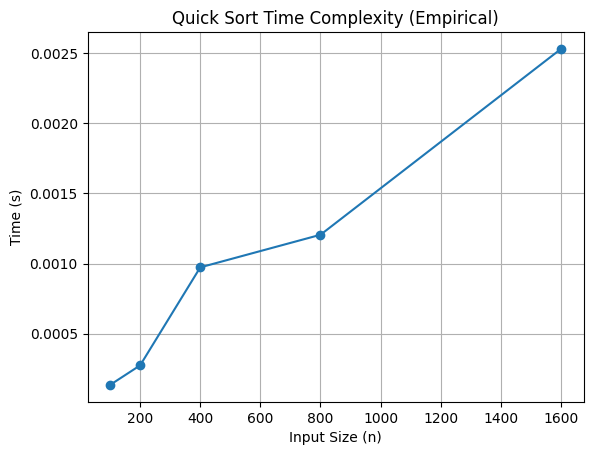

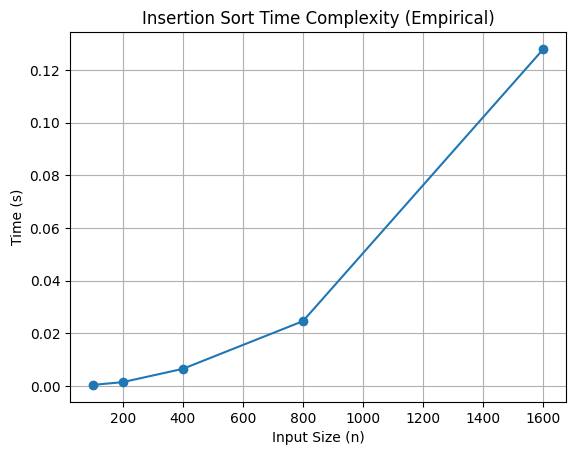

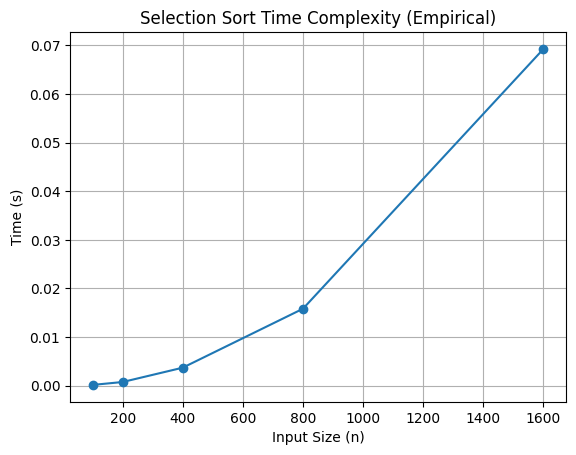

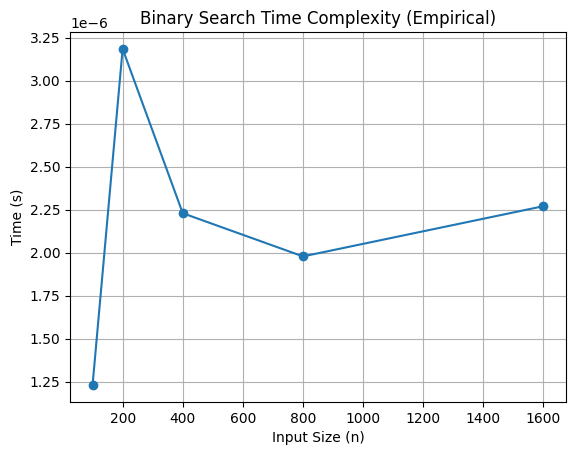

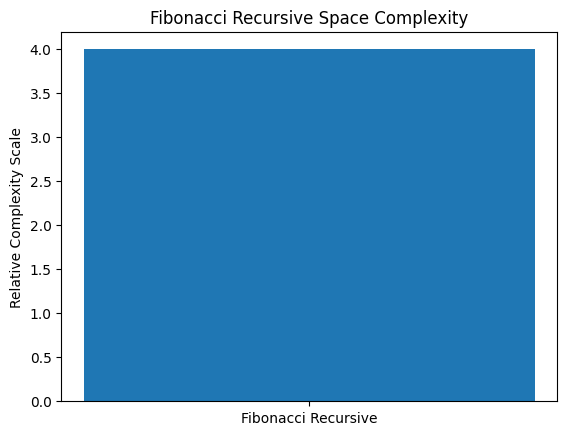

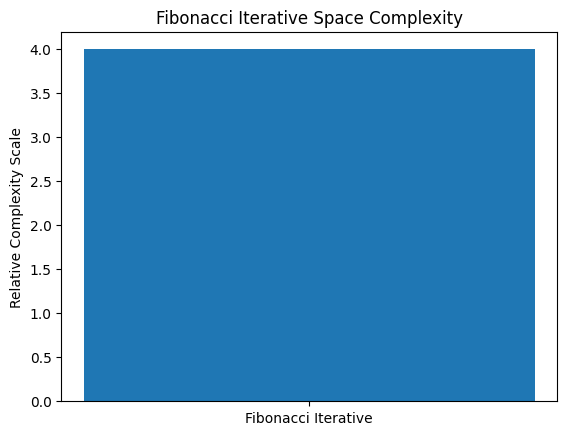

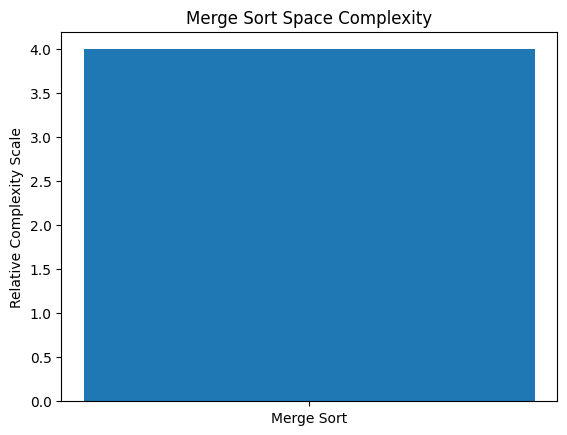

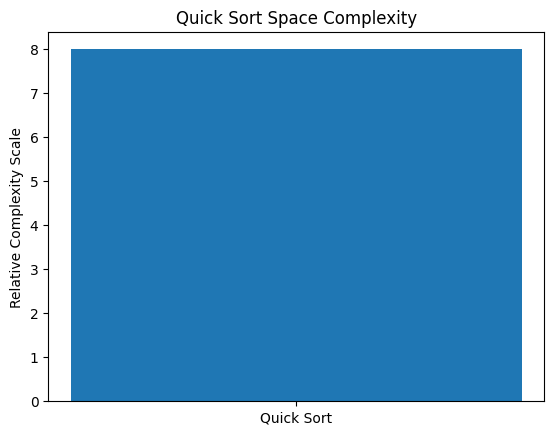

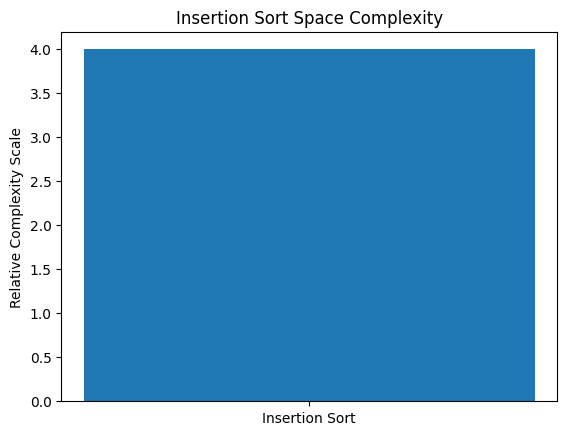

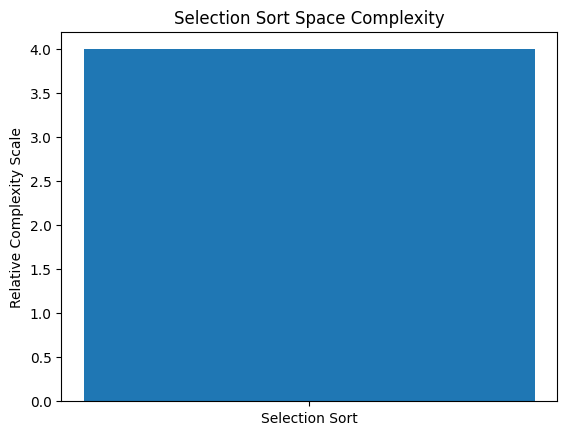

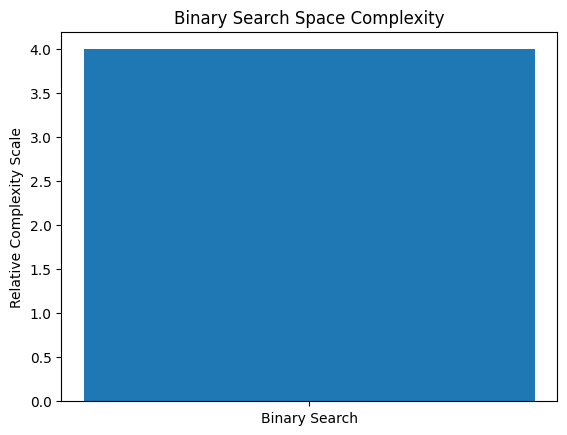

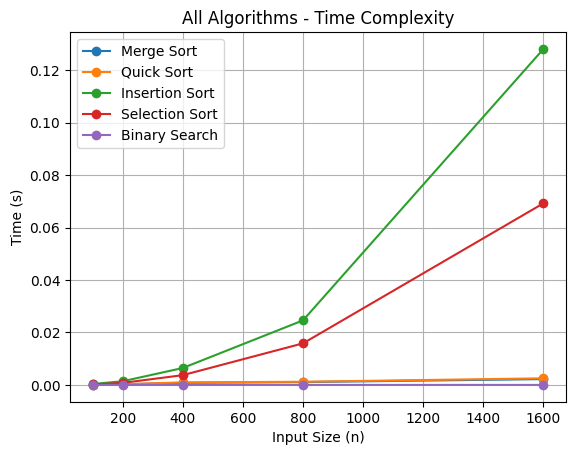

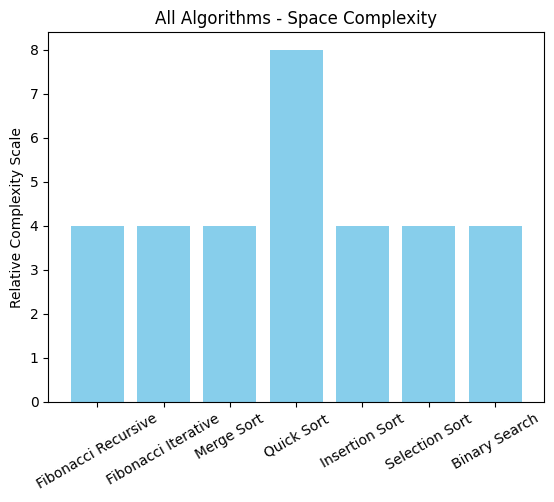

In [ ]:
import matplotlib.pyplot as plt
import time
import random
import sys

sys.setrecursionlimit(20000) # allow deep recursion for Fibonacci


# Fibonacci Recursive
def fibonacci_recursive(n):
    if n <= 1:
        return n
    return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

# Fibonacci Iterative
def fibonacci_iterative(n):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

# Merge Sort
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge_lists(left, right)

def merge_lists(left, right):
    result, i, j = [], 0, 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i]); i += 1
        else:
            result.append(right[j]); j += 1
    result.extend(left[i:]); result.extend(right[j:])
    return result

# Quick Sort
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = random.choice(arr)
    low = [x for x in arr if x < pivot]
    mid = [x for x in arr if x == pivot]
    high = [x for x in arr if x > pivot]
    return quick_sort(low) + mid + quick_sort(high)

# Insertion Sort
def insertion_sort(arr):
    a = arr.copy()
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and a[j] > key:
            a[j+1] = a[j]
            j -= 1
        a[j+1] = key
    return a

# Selection Sort
def selection_sort(arr):
    a = arr.copy()
    for i in range(len(a)):
        min_idx = i
        for j in range(i+1, len(a)):
            if a[j] < a[min_idx]:
                min_idx = j
        a[i], a[min_idx] = a[min_idx], a[i]
    return a

# Binary Search
def binary_search(arr, target):
    l, r = 0, len(arr) - 1
    while l <= r:
        mid = (l + r) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            l = mid + 1
        else:
            r = mid - 1
    return -1



def measure_time(fn, *args):
    t0 = time.perf_counter()
    fn(*args)
    return time.perf_counter() - t0

# Theoretical space complexities (for plotting)
space_complexity = {
    "Fibonacci Recursive": "O(n)",
    "Fibonacci Iterative": "O(1)",
    "Merge Sort": "O(n)",
    "Quick Sort": "O(log n)",
    "Insertion Sort": "O(1)",
    "Selection Sort": "O(1)",
    "Binary Search": "O(1)"
}







# Fibonacci (smaller sizes for recursion)
sizes_fib = [5, 10, 20, 25]
fib_time_rec, fib_time_iter = [], []

for n in sizes_fib:
    fib_time_rec.append(measure_time(fibonacci_recursive, n))
    fib_time_iter.append(measure_time(fibonacci_iterative, n))

# Sorting & Binary Search
sizes = [100, 200, 400, 800, 1600]
time_results = {
    "Merge Sort": [],
    "Quick Sort": [],
    "Insertion Sort": [],
    "Selection Sort": [],
    "Binary Search": []
}

for n in sizes:
    arr = list(range(n, 0, -1))
    time_results["Merge Sort"].append(measure_time(merge_sort, arr.copy()))
    time_results["Quick Sort"].append(measure_time(quick_sort, arr.copy()))
    time_results["Insertion Sort"].append(measure_time(insertion_sort, arr.copy()))
    time_results["Selection Sort"].append(measure_time(selection_sort, arr.copy()))
    time_results["Binary Search"].append(measure_time(binary_search, sorted(arr), n//2))




# Fibonacci Time Comparison
plt.figure()
plt.plot(sizes_fib, fib_time_rec, marker='o', label="Recursive")
plt.plot(sizes_fib, fib_time_iter, marker='s', label="Iterative")
plt.title("Fibonacci: Recursive vs Iterative (Time)")
plt.xlabel("n")
plt.ylabel("Time (s)")
plt.legend()
plt.grid()
plt.show()

# Fibonacci Space Comparison
plt.figure()
plt.bar(["Recursive", "Iterative"], [len("O(n)"), len("O(1)")], color=["red", "green"])
plt.title("Fibonacci: Recursive vs Iterative (Space)")
plt.ylabel("Relative Complexity Scale")
plt.show()







for algo, times in time_results.items():
    plt.figure()
    plt.plot(sizes, times, marker='o')
    plt.title(f"{algo} Time Complexity (Empirical)")
    plt.xlabel("Input Size (n)")
    plt.ylabel("Time (s)")
    plt.grid()
    plt.show()



# Combined Time
plt.figure()
for algo, times in time_results.items():
    plt.plot(sizes, times, marker='o', label=algo)
plt.title("All Algorithms - Time Complexity")
plt.xlabel("Input Size (n)")
plt.ylabel("Time (s)")
plt.legend()
plt.grid()
plt.show()

# Combined Space
plt.figure()
plt.bar(list(space_complexity.keys()), [len(v) for v in space_complexity.values()], color="skyblue")
plt.title("All Algorithms - Space Complexity")
plt.ylabel("Relative Complexity Scale")
plt.xticks(rotation=30)
plt.show()